# Data link

https://docs.google.com/spreadsheets/d/1ksDO_g2my6rY_fLHT67Dkq6r2Laql1rFoSuddqS8mV8/edit#gid=0

# Import Libraries

In [507]:
# Import Libraries for Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
color = sns.color_palette("Set3", 10)
sns.set_palette(palette = color)

# load data

In [508]:
filename = 'ReviewPaperBenchmarks1.xlsx'
df = pd.read_excel(filename)
N = 1024 * 1024 * 1024
df['GPUUsed'] = df['GPUUsed'].apply(lambda x: x/N)
df = df.round(2)
df.replace('v2c','Vox2Cortex',inplace=True)
df.sort_values(by=['ModelName'], inplace=True)
df.reset_index(drop=True, inplace = True)

In [509]:
df

,done?,GPUTYPE,ModelName,CompositeModelSize,PialModelSize,White model size,TotalModelSize,GPUPercent,GPUTotal,GPUUsed,Time
0,yes,V100-SXM2-32GB,CortexODE,5.10,1.25,1.25,7.60,12.51,3.435974e+10,4.00,5.65
1,yes,V100-SXM2-32GB,CorticalFlow,0.00,1.24,1.98,3.23,3.91,3.435974e+10,1.25,5.99
2,check model size,RTX 2080 Ti,DeepCSR,19.32,0.00,0.00,19.32,13.27,1.181116e+10,1.46,114.36
3,no,NaN,PialNN,0.00,3.77,0.00,3.77,7.42,3.435974e+10,2.37,2.95
4,yes,RTX 2080 Ti,Topofit,0.00,0.00,6.54,6.54,13.30,4.830580e+10,5.98,3.27
5,check model size,RTX 2080 Ti,Vox2Cortex,25.01,0.00,0.00,25.01,14.73,3.435974e+10,4.71,0.84


# Collect model size data

In [510]:
n_model = 6
sub_models = ['ModelName', 'CompositeModelSize', 'PialModelSize','White model size']


# initialize df_size
df_size = pd.DataFrame()


# create df_size['ModelName']
for col in sub_models:
    df_size[col] = df[col]

# reverse the rows
df_size = df_size[::-1]

In [511]:
df_size

,ModelName,CompositeModelSize,PialModelSize,White model size
5,Vox2Cortex,25.01,0.00,0.00
4,Topofit,0.00,0.00,6.54
3,PialNN,0.00,3.77,0.00
2,DeepCSR,19.32,0.00,0.00
1,CorticalFlow,0.00,1.24,1.98
0,CortexODE,5.10,1.25,1.25


# Plot

## plot time

### get data

In [528]:
from collections import defaultdict
# Get Data for Time Statistics

def get_data():
    MAXNUM = 100
    filename = 'v-mar16.xlsx'
    df = pd.read_excel(filename,header=None,sheet_name='Sheet6')
    df = df.rename(columns={0:'Model',1:'Time'})
    oldvalues = ['v2c', 'topofit', 'DeepCSR-v2','cortexODE']
    newvalues = ['Vox2Cortex', 'Topofit', 'DeepCSR','CortexODE']
    df['Model'] = df['Model'].replace(oldvalues, newvalues)
    
    ms = list(df['Model'].unique())
    dic = defaultdict(list)
    for _, row in df.iterrows():
        dic[row['Model']].append(row['Time'])
    for k in dic:
        dic[k] = dic[k][:MAXNUM]
        print('runtime median: ', round(np.median(dic[k]),2),'   std: ',round(np.std(dic[k]),2), '  for model: ', k)
        print('runtime mean: ', round(np.mean(dic[k]),2),'   std: ',round(np.std(dic[k]),2), '  for model: ', k)
    
    m_col = []
    t_col = []
    for k in dic:
        m_col += [k] * len(dic[k])
        t_col += dic[k]
    newdf = pd.DataFrame()
    newdf['Model'] = m_col
    newdf['Time'] = t_col
    
#     cur_model_orders = df['Model'].unique()
#     should_order = [5,4,0,1,2,3]
#     dic = defaultdict(int)
#     for idx,i in enumerate(cur_model_orders):
#         dic[i] = should_order[idx]
#     df['Order'] = df['Model'].apply(lambda x:dic[x])
    newdf.sort_values(by=['Model'],inplace=True, ascending=True)
    newdf.reset_index(drop=True, inplace = True)
    return newdf

In [529]:
df

,done?,GPUTYPE,ModelName,CompositeModelSize,PialModelSize,White model size,TotalModelSize,GPUPercent,GPUTotal,GPUUsed,Time
0,yes,V100-SXM2-32GB,CortexODE,5.10,1.25,1.25,7.60,12.51,3.435974e+10,4.00,5.65
1,yes,V100-SXM2-32GB,CorticalFlow,0.00,1.24,1.98,3.23,3.91,3.435974e+10,1.25,5.99
2,check model size,RTX 2080 Ti,DeepCSR,19.32,0.00,0.00,19.32,13.27,1.181116e+10,1.46,114.36
3,no,NaN,PialNN,0.00,3.77,0.00,3.77,7.42,3.435974e+10,2.37,2.95
4,yes,RTX 2080 Ti,Topofit,0.00,0.00,6.54,6.54,13.30,4.830580e+10,5.98,3.27
5,check model size,RTX 2080 Ti,Vox2Cortex,25.01,0.00,0.00,25.01,14.73,3.435974e+10,4.71,0.84


In [530]:
sns.color_palette("Set3")[6:]

[(0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [531]:
sns.color_palette("Set1")

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [532]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [533]:
color = sns.color_palette("Set3")[6:]
sns.set_palette(palette = color)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


runtime median:  2.07    std:  2.56   for model:  CorticalFlow
runtime mean:  2.54    std:  2.56   for model:  CorticalFlow
runtime median:  3.46    std:  0.44   for model:  PialNN
runtime mean:  3.57    std:  0.44   for model:  PialNN
runtime median:  8.62    std:  0.28   for model:  Vox2Cortex
runtime mean:  8.7    std:  0.28   for model:  Vox2Cortex
runtime median:  99.71    std:  15.41   for model:  DeepCSR
runtime mean:  106.18    std:  15.41   for model:  DeepCSR
runtime median:  2.44    std:  0.12   for model:  Topofit
runtime mean:  2.48    std:  0.12   for model:  Topofit
runtime median:  4.6    std:  0.41   for model:  CortexODE
runtime mean:  4.74    std:  0.41   for model:  CortexODE








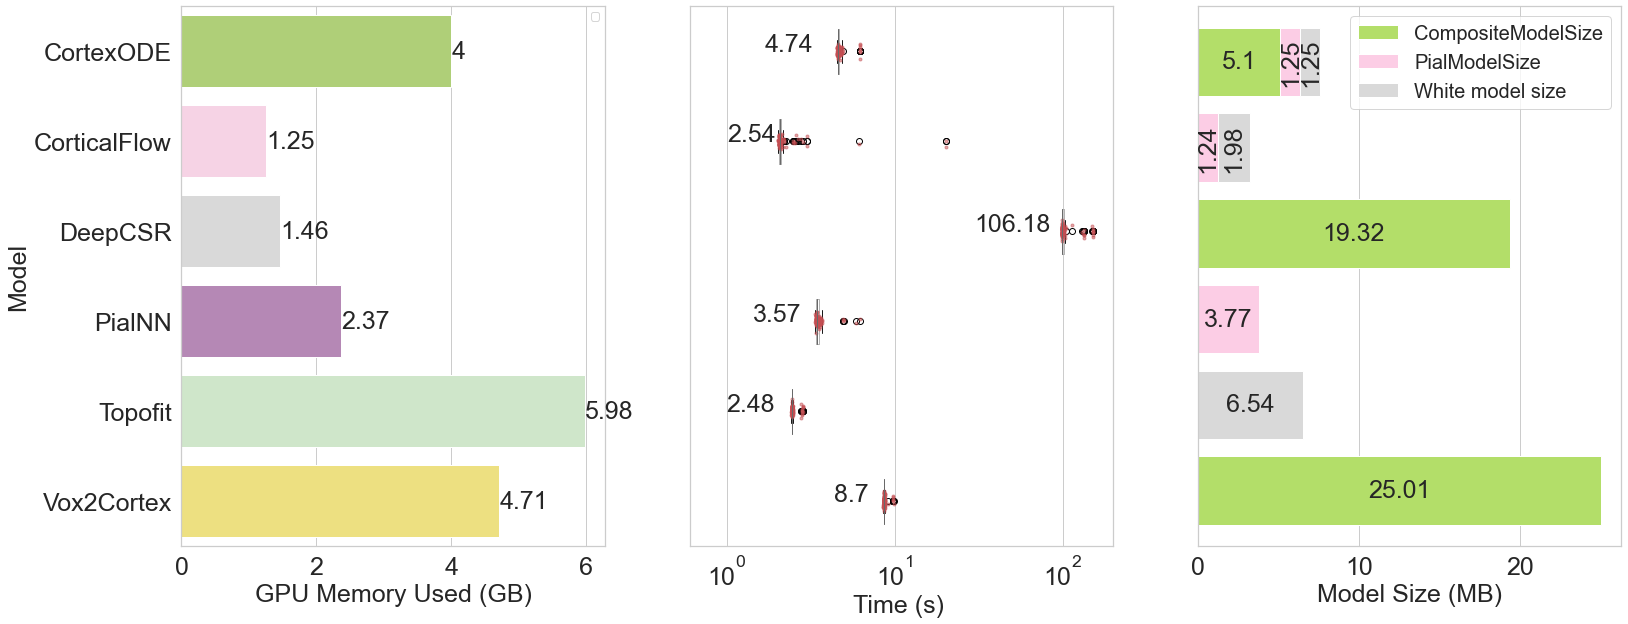

In [534]:
S = 25
plt.rcParams.update({'font.size': S,'xtick.labelsize':S, 'axes.titlesize':S})

# title = 'Time and Memory Measures for Surface Generation'
fig, axs = plt.subplots(nrows = 1, ncols=3)
# fig.suptitle(title)
fig.set_figheight(10)
fig.set_figwidth(25)


# --------------------------------------Draw GPU------------------------------------

sns.barplot(data=df, y="ModelName", x='GPUUsed', ax = axs[0])

idx =0
ax = axs[idx]
ax.set_xlabel('GPU Memory Used (GB)')
ax.xaxis.label.set_size(S)
ax.yaxis.label.set_size(S)
ax.xaxis.label.set_size(S)
ax.tick_params(axis='both', which='major', labelsize=S)
ax.bar_label(axs[idx].containers[0], label_type='edge')
ax.set(xlabel='GPU Memory Used (GB)', ylabel='Model')
ax.legend().set_title('')
# axs[idx].set_yticklabels(model_names)

# --------------------------------------Draw Time-----------------------------------
idx = 1
ax = axs[idx]
# sns.barplot(data=df, y="ModelName", x='Time', ax = axs[1])
# axs[idx].yaxis.set_visible(False)
# axs[idx].set_xscale('log')
# axs[idx].set_xlabel('Time(s) ')
# axs[idx].xaxis.label.set_size(S)
# axs[idx].bar_label(axs[idx].containers[0],label_type='edge');

# Plot
title = 'Duration of Surface Generation'
xlabel = 'Time (s)'
tmp = get_data()
bp = tmp.boxplot(by='Model', column='Time', ax=ax, grid=False, vert=False, positions=[5,4,3,2,1,0], fontsize=S)

for idx,i in enumerate(mlist):
    x = tmp.Time[tmp.Model==i]
    print()
    # Add some random "jitter" to the x-axis
    y = np.random.normal(idx, 0.04, size=len(x))
    bp.plot(x,y, 'r.', alpha=0.5)
    plt.gca().invert_yaxis()
plt.title('')
ax.set_xscale('log')
ax.set_xlabel('Time (s) ',fontsize=S)
ax.yaxis.set_visible(False)
bp.get_figure().suptitle('')
ax.set_title('')
ax.grid(axis='x')
left = 0.6
right = 200
ax.set_xlim(left, right)

x = 8.7
y = 0 
OFF = 0.3
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

x = 2.48
y = 1
OFF = 0.4
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

x = 3.57
y = 2
OFF = 0.4
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

x = 106.18
y = 3
OFF = 0.55
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

x = 2.54
y = 4
OFF = 0.4
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

x = 4.74
y = 5
OFF = 0.45
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

# plt.savefig('plotTime.svg', format='svg', transparent=True, bbox_inches='tight', pad_inches=0);


# -------------------------------------Draw Model Size-----------------------------------------------------

idx = 2
ax = axs[idx]

df_size.plot(kind='barh',stacked=True, ax = ax,width=.8,fontsize=S);


# ax.set_xscale('log')
ax.yaxis.set_visible(False)
ax.yaxis.label.set_size(S)
ax.xaxis.label.set_size(S)
ax.tick_params(axis='both', which='major', labelsize=S)
ax.set_xlabel('Model Size (MB)');
ax.legend(prop={'size': 20},)
row = 1
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_width() if v.get_width() > 0 else '' for v in c]
    modified_labels = []
    for l in labels:
        if l == '':
            modified_labels.append('')
        else:
            modified_labels.append(str(round(float(l),2)))

    if row == 1:
        ax.bar_label(c, labels=modified_labels, label_type='center');
    if row == 2:
        ax.bar_label(c, labels=['', '', '3.77', '', '', ''], label_type='center');
        ax.bar_label(c, labels=['', '', '', '', '1.24', '1.25'], label_type='center', rotation = 90);
    if row == 3:
        ax.bar_label(c, labels=['', '6.54', '', '', '', ''], label_type='center');
        ax.bar_label(c, labels=['', '', '', '', '1.98', '1.25'], label_type='center', rotation = 90);
    row += 1
  

    
plt.savefig('plot3.svg', format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

# Change Plot of the TIME

In [535]:
color = sns.color_palette("Set1")[1:]

In [536]:
color[:6]

[(0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392)]

In [537]:
df

,done?,GPUTYPE,ModelName,CompositeModelSize,PialModelSize,White model size,TotalModelSize,GPUPercent,GPUTotal,GPUUsed,Time
0,yes,V100-SXM2-32GB,CortexODE,5.10,1.25,1.25,7.60,12.51,3.435974e+10,4.00,5.65
1,yes,V100-SXM2-32GB,CorticalFlow,0.00,1.24,1.98,3.23,3.91,3.435974e+10,1.25,5.99
2,check model size,RTX 2080 Ti,DeepCSR,19.32,0.00,0.00,19.32,13.27,1.181116e+10,1.46,114.36
3,no,NaN,PialNN,0.00,3.77,0.00,3.77,7.42,3.435974e+10,2.37,2.95
4,yes,RTX 2080 Ti,Topofit,0.00,0.00,6.54,6.54,13.30,4.830580e+10,5.98,3.27
5,check model size,RTX 2080 Ti,Vox2Cortex,25.01,0.00,0.00,25.01,14.73,3.435974e+10,4.71,0.84


In [538]:
df

,done?,GPUTYPE,ModelName,CompositeModelSize,PialModelSize,White model size,TotalModelSize,GPUPercent,GPUTotal,GPUUsed,Time
0,yes,V100-SXM2-32GB,CortexODE,5.10,1.25,1.25,7.60,12.51,3.435974e+10,4.00,5.65
1,yes,V100-SXM2-32GB,CorticalFlow,0.00,1.24,1.98,3.23,3.91,3.435974e+10,1.25,5.99
2,check model size,RTX 2080 Ti,DeepCSR,19.32,0.00,0.00,19.32,13.27,1.181116e+10,1.46,114.36
3,no,NaN,PialNN,0.00,3.77,0.00,3.77,7.42,3.435974e+10,2.37,2.95
4,yes,RTX 2080 Ti,Topofit,0.00,0.00,6.54,6.54,13.30,4.830580e+10,5.98,3.27
5,check model size,RTX 2080 Ti,Vox2Cortex,25.01,0.00,0.00,25.01,14.73,3.435974e+10,4.71,0.84


In [539]:
get_data()

runtime median:  2.07    std:  2.56   for model:  CorticalFlow
runtime mean:  2.54    std:  2.56   for model:  CorticalFlow
runtime median:  3.46    std:  0.44   for model:  PialNN
runtime mean:  3.57    std:  0.44   for model:  PialNN
runtime median:  8.62    std:  0.28   for model:  Vox2Cortex
runtime mean:  8.7    std:  0.28   for model:  Vox2Cortex
runtime median:  99.71    std:  15.41   for model:  DeepCSR
runtime mean:  106.18    std:  15.41   for model:  DeepCSR
runtime median:  2.44    std:  0.12   for model:  Topofit
runtime mean:  2.48    std:  0.12   for model:  Topofit
runtime median:  4.6    std:  0.41   for model:  CortexODE
runtime mean:  4.74    std:  0.41   for model:  CortexODE


,Model,Time
0,CortexODE,4.588897
1,CortexODE,4.646809
2,CortexODE,4.599063
3,CortexODE,4.713589
4,CortexODE,4.829089
...,...,...
595,Vox2Cortex,8.531065
596,Vox2Cortex,8.676783
597,Vox2Cortex,8.686550
598,Vox2Cortex,8.632509


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


runtime median:  2.07    std:  2.56   for model:  CorticalFlow
runtime mean:  2.54    std:  2.56   for model:  CorticalFlow
runtime median:  3.46    std:  0.44   for model:  PialNN
runtime mean:  3.57    std:  0.44   for model:  PialNN
runtime median:  8.62    std:  0.28   for model:  Vox2Cortex
runtime mean:  8.7    std:  0.28   for model:  Vox2Cortex
runtime median:  99.71    std:  15.41   for model:  DeepCSR
runtime mean:  106.18    std:  15.41   for model:  DeepCSR
runtime median:  2.44    std:  0.12   for model:  Topofit
runtime mean:  2.48    std:  0.12   for model:  Topofit
runtime median:  4.6    std:  0.41   for model:  CortexODE
runtime mean:  4.74    std:  0.41   for model:  CortexODE
['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__s

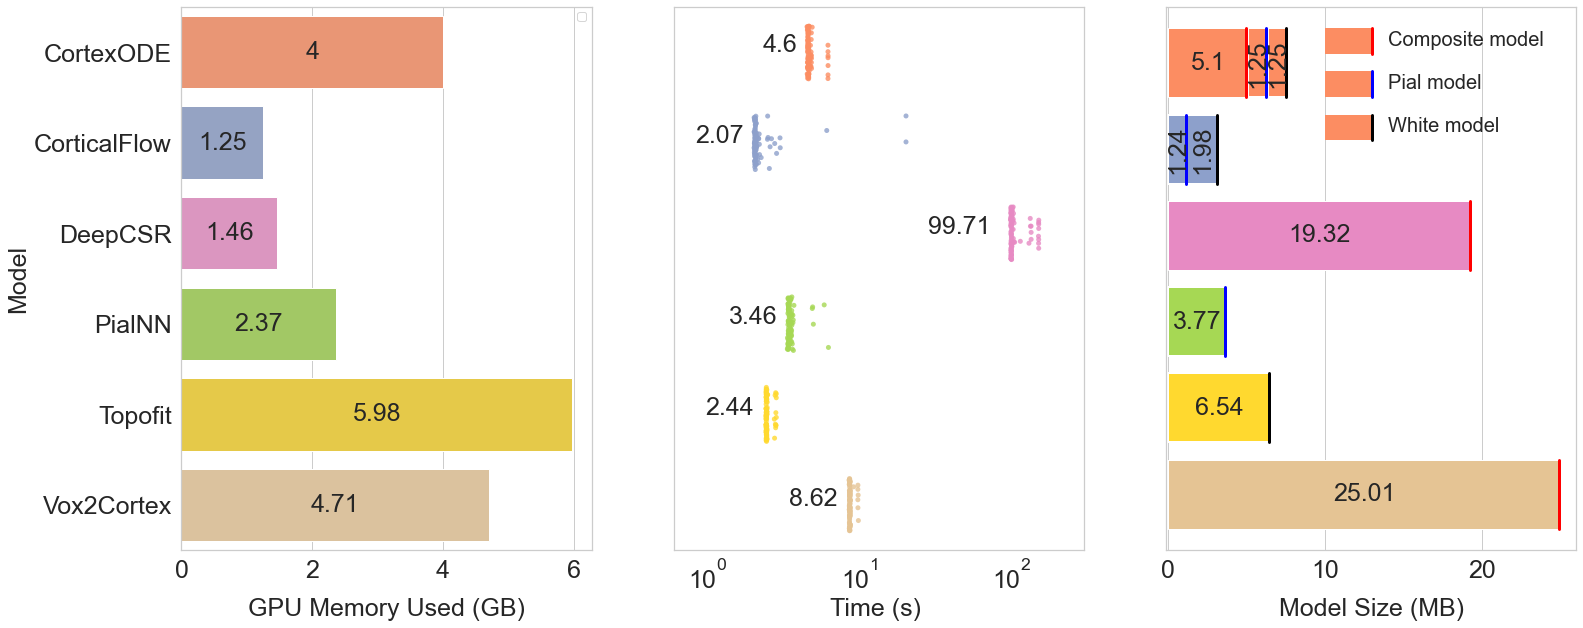

In [561]:
color = sns.color_palette("Set2")[1:]
sns.set_palette(palette = color)

S = 25
plt.rcParams.update({'font.size': S,'xtick.labelsize':S, 'axes.titlesize':S})

# title = 'Time and Memory Measures for Surface Generation'
fig, axs = plt.subplots(nrows = 1, ncols=3)
# fig.suptitle(title)
fig.set_figheight(10)
fig.set_figwidth(25)


# --------------------------------------Draw GPU------------------------------------

sns.barplot(data=df, y="ModelName", x='GPUUsed', ax = axs[0])

idx =0
ax = axs[idx]
ax.set_xlabel('GPU Memory Used (GB)')
ax.xaxis.label.set_size(S)
ax.yaxis.label.set_size(S)
ax.xaxis.label.set_size(S)
ax.tick_params(axis='both', which='major', labelsize=S)
ax.bar_label(axs[idx].containers[0], label_type='center')
ax.set(xlabel='GPU Memory Used (GB)', ylabel='Model')
ax.legend().set_title('')


# axs[idx].set_yticklabels(model_names)

# --------------------------------------Draw Time-----------------------------------
idx = 1
ax = axs[idx]
p = sns.stripplot(data = get_data(),y = "Model",x = "Time",size=5, alpha=0.8, ax=ax, jitter=.3)
p.set_xscale('log')

plt.title('')
ax.set_xscale('log')
ax.set_xlabel('Time (s) ',fontsize=S)
ax.yaxis.set_visible(False)
bp.get_figure().suptitle('')
ax.set_title('')
ax.grid(axis='x')
left = 0.6
right = 300
ax.set_xlim(left, right)

x = 8.62
y = 5
OFF = 0.4
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

x = 2.44
y = 4
OFF = 0.4
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

x = 3.46
y = 3
OFF = 0.4
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

x = 99.71
y = 2
OFF = 0.55
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

x = 2.07
y = 1
OFF = 0.4
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

x = 4.6
y = 0
OFF = 0.3
xn = 10**(np.log10(x) - OFF)
ax.text(xn, y, x, fontsize=S)

# -------------------------------------Draw Model Size-----------------------------------------------------

idx = 2
ax = axs[idx]


# markdict={'Sun':'x','Thur':'o','Sat':'o','Fri':'o'}

df_size.plot(kind='barh',stacked=True, ax = ax,width=.8,fontsize=S, style=['*']*14);


# ax.set_xscale('log')
ax.yaxis.set_visible(False)
ax.yaxis.label.set_size(S)
ax.xaxis.label.set_size(S)
ax.tick_params(axis='both', which='major', labelsize=S)
ax.set_xlabel('Model Size (MB)');
print(dir(ax.legend))
# ax.legend(prop={'size': 20},labels=['Composite model size','Pial model size','White model size'])



# first = [[.5, 0],[0.5, 3],[0.5, 5]]
# for x,y in first:
#     y += .2
#     x -= .3
#     ax.text(x, y, '*', fontsize=S)

# # second = [[5.6,5],[0.5,2],[0.5,4]]
# # for x,y in second:
# #     ax.text(x, y, '+', fontsize=S)

# third = [[1.8,4],[6.7,5],[0.5,1]]
# for x,y in third:
#     x -= .3
#     y += .25
#     ax.text(x, y, '-', fontsize=S)

row = 1
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_width() if v.get_width() > 0 else '' for v in c]
    modified_labels = []
    for l in labels:
        if l == '':
            modified_labels.append('')
        else:
            modified_labels.append(str(round(float(l),2)))

    if row == 1:
        ax.bar_label(c, labels=modified_labels, label_type='center');
    if row == 2:
        ax.bar_label(c, labels=['', '', '3.77', '', '', ''], label_type='center');
        ax.bar_label(c, labels=['', '', '', '', '1.24', '1.25'], label_type='center', rotation = 90, fontsize=25);
    if row == 3:
        ax.bar_label(c, labels=['', '6.54', '', '', '', ''], label_type='center');
        ax.bar_label(c, labels=['', '', '', '', '1.98', '1.25'], label_type='center', rotation = 90, fontsize=25);
    row += 1

lw = 3
for j in range(3):
    for i in range(6):
        ax.containers[j][i].set_facecolor(color[5 - i])
        ax.containers[j][i].set_linewidth(1)
        ax.containers[j][i].set_alpha(1)
        dic = {0:'red',1:'blue',2:'black'}
        
        bar = ax.containers[j][i]
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        if x+w!=0:
            ax.plot([x + w - 0.1, x + w - 0.1], [y, y + h], color=dic[j], lw=lw)
    
        if j==2:
            ax.containers[j][i].set_linewidth(2)
        if j==1:
            ax.containers[j][i].set_linewidth(2)

ec = 'none'
fc = color[0]
plt.gca().add_patch(Rectangle((10,5.1),height=.3,width=3,linewidth=1,edgecolor=ec,facecolor=fc))
ax.plot([13,  13], [5.1, 5.4], color='red', lw=lw)
plt.gca().add_patch(Rectangle((10,4.6),height=.3,width=3,linewidth=1,edgecolor=ec,facecolor=fc))
ax.plot([13,  13], [4.6, 4.9], color='blue', lw=lw)
plt.gca().add_patch(Rectangle((10,4.1),height=.3,width=3,linewidth=1,edgecolor=ec,facecolor=fc))
ax.plot([13,  13], [4.1, 4.4], color='black', lw=lw)

labels=['Composite model','Pial model','White model']
ax.get_legend().remove()

first = [[14, 5.15],[14, 4.65],[14, 4.15]]
idx = 0
for x,y in first:
    y -=0.05
    y += 0.1
    ax.text(x, y, labels[idx], fontsize=20)
    idx += 1
left = -0.1
right = 26
ax.set_xlim(left, right)

fig.align_xlabels(axs)

plt.savefig('plot3.svg', format='svg', transparent=True, bbox_inches='tight', pad_inches=0)

In [554]:
tmp = get_data()

runtime median:  2.07    std:  2.56   for model:  CorticalFlow
runtime mean:  2.54    std:  2.56   for model:  CorticalFlow
runtime median:  3.46    std:  0.44   for model:  PialNN
runtime mean:  3.57    std:  0.44   for model:  PialNN
runtime median:  8.62    std:  0.28   for model:  Vox2Cortex
runtime mean:  8.7    std:  0.28   for model:  Vox2Cortex
runtime median:  99.71    std:  15.41   for model:  DeepCSR
runtime mean:  106.18    std:  15.41   for model:  DeepCSR
runtime median:  2.44    std:  0.12   for model:  Topofit
runtime mean:  2.48    std:  0.12   for model:  Topofit
runtime median:  4.6    std:  0.41   for model:  CortexODE
runtime mean:  4.74    std:  0.41   for model:  CortexODE


runtime median:  2.07    std:  2.56   for model:  CorticalFlow
runtime mean:  2.54    std:  2.56   for model:  CorticalFlow
runtime median:  3.46    std:  0.44   for model:  PialNN
runtime mean:  3.57    std:  0.44   for model:  PialNN
runtime median:  8.62    std:  0.28   for model:  Vox2Cortex
runtime mean:  8.7    std:  0.28   for model:  Vox2Cortex
runtime median:  99.71    std:  15.41   for model:  DeepCSR
runtime mean:  106.18    std:  15.41   for model:  DeepCSR
runtime median:  2.44    std:  0.12   for model:  Topofit
runtime mean:  2.48    std:  0.12   for model:  Topofit
runtime median:  4.6    std:  0.41   for model:  CortexODE
runtime mean:  4.74    std:  0.41   for model:  CortexODE


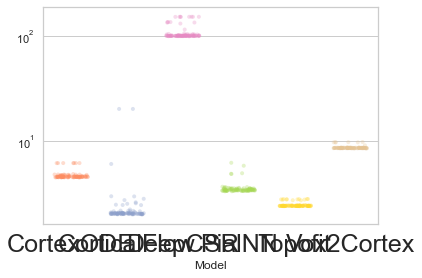

<Figure size 432x288 with 0 Axes>

In [542]:
tmp = get_data()
p = sns.stripplot(x = tmp.Model,y = list(tmp.Time), size=4, alpha=0.3, jitter=.3)
p.set_yscale('log')
plt.show()
plt.savefig('ff.png',dpi=200)

runtime median:  2.07    std:  2.56   for model:  CorticalFlow
runtime mean:  2.54    std:  2.56   for model:  CorticalFlow
runtime median:  3.46    std:  0.44   for model:  PialNN
runtime mean:  3.57    std:  0.44   for model:  PialNN
runtime median:  8.62    std:  0.28   for model:  Vox2Cortex
runtime mean:  8.7    std:  0.28   for model:  Vox2Cortex
runtime median:  99.71    std:  15.41   for model:  DeepCSR
runtime mean:  106.18    std:  15.41   for model:  DeepCSR
runtime median:  2.44    std:  0.12   for model:  Topofit
runtime mean:  2.48    std:  0.12   for model:  Topofit
runtime median:  4.6    std:  0.41   for model:  CortexODE
runtime mean:  4.74    std:  0.41   for model:  CortexODE


/Users/mialu/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mialu/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mialu/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mialu/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mialu/opt/anaconda3/lib/python3.9/site-packages/s

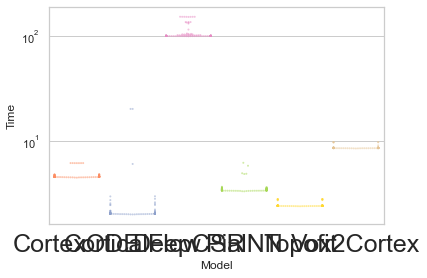

In [543]:
p = sns.swarmplot(data = get_data(),x = "Model",y = "Time",size=2, alpha=0.5)
p.set_yscale('log')

plt.savefig('f.png',dpi=200)

# Supplementary Material

In [544]:
'''
# set colors
edgecolor = color[:6]

model_names = df['ModelName'].tolist()
model_names[0] = 'Vox2Cortex'


S = 25
plt.rcParams.update({'font.size': S,'xtick.labelsize':S, 'axes.titlesize':S})


fig, axs = plt.subplots(nrows = 1, ncols=3)

fig.set_figheight(10)
fig.set_figwidth(25)
fig.suptitle(title)

# Draw GPU

sns.barplot(data=df, y="ModelName", x='GPUUsed', ax = axs[0], edgecolor = edgecolor)

idx =0
axs[idx].set_xlabel('GPU Used (GB)')
axs[idx].xaxis.label.set_size(S)
axs[idx].yaxis.label.set_size(S)
axs[idx].xaxis.label.set_size(S)
axs[idx].tick_params(axis='both', which='major', labelsize=S)
axs[idx].bar_label(axs[idx].containers[0], label_type='edge')
axs[idx].set_yticklabels(model_names)

# Draw Time
idx = 1
ax = axs[idx]
sns.barplot(data=df, y="ModelName", x='Time', ax = axs[1], edgecolor = edgecolor)
axs[idx].yaxis.set_visible(False)
axs[idx].set_xscale('log')
axs[idx].set_xlabel('log: Time(s) ')
axs[idx].xaxis.label.set_size(S)
axs[idx].bar_label(axs[idx].containers[0],label_type='edge');

# Draw Model Size

idx = 2
ax = axs[idx]

df_size.plot(kind='barh',stacked=True, ax = ax,width=.8);


# ax.set_xscale('log')
ax.yaxis.set_visible(False)
ax.yaxis.label.set_size(S)
ax.xaxis.label.set_size(S)
ax.tick_params(axis='both', which='major', labelsize=S)
ax.set_xlabel('Model Size (MB)');
ax.set_yticklabels(model_names)

for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_width() if v.get_width() > 0 else '' for v in c]
    modified_labels = []
    for l in labels:
        if l == '':
            modified_labels.append('')
        else:
            modified_labels.append(str(round(float(l),2)))

    # remove the labels parameter if it's not needed for customized labels
#     if row > 0:
#         ax.bar_label(c, labels=modified_labels, label_type='edge')
#     else:
    
    ax.bar_label(c, labels=modified_labels, label_type='center', rotation=90);
#     row = 0;


# print(dir(ax))

# for j in range(3):
#     for i in range(6):
#         ax.containers[j][i].set_edgecolor(color[5 - i])
#         ax.containers[j][i].set_linewidth(10)
#         ax.containers[j][i].set_alpha(.8)
        
        
'''

'\n# set colors\nedgecolor = color[:6]\n\nmodel_names = df[\'ModelName\'].tolist()\nmodel_names[0] = \'Vox2Cortex\'\n\n\nS = 25\nplt.rcParams.update({\'font.size\': S,\'xtick.labelsize\':S, \'axes.titlesize\':S})\n\n\nfig, axs = plt.subplots(nrows = 1, ncols=3)\n\nfig.set_figheight(10)\nfig.set_figwidth(25)\nfig.suptitle(title)\n\n# Draw GPU\n\nsns.barplot(data=df, y="ModelName", x=\'GPUUsed\', ax = axs[0], edgecolor = edgecolor)\n\nidx =0\naxs[idx].set_xlabel(\'GPU Used (GB)\')\naxs[idx].xaxis.label.set_size(S)\naxs[idx].yaxis.label.set_size(S)\naxs[idx].xaxis.label.set_size(S)\naxs[idx].tick_params(axis=\'both\', which=\'major\', labelsize=S)\naxs[idx].bar_label(axs[idx].containers[0], label_type=\'edge\')\naxs[idx].set_yticklabels(model_names)\n\n# Draw Time\nidx = 1\nax = axs[idx]\nsns.barplot(data=df, y="ModelName", x=\'Time\', ax = axs[1], edgecolor = edgecolor)\naxs[idx].yaxis.set_visible(False)\naxs[idx].set_xscale(\'log\')\naxs[idx].set_xlabel(\'log: Time(s) \')\naxs[idx].xaxi